In [71]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

from imblearn.over_sampling import SMOTE

In [72]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df.shape

(10000, 14)

In [74]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

1. RowNumber: Won't contribute to analysis.
2. CustomerId: Can be used to track individual Customer.
3. Surname: Family name of each customer.
4. CreditScore: Score for credit worthiness.
5. Geography: customer's geographic distribution, allows for regional or national factors.
6. Gender: gender-based analysis.
7. Age: customer age's in years, age-related analysis.
8. Tenure: # of years, customer's relation with bank.
9. Balance: current balance of customer.
10. NumOfProducts: customer's banking products like, loads, credit, saving accounts,  etc.
11. HasCrCard: binary value, has card or no.
12. IsActiveMember: binary value, is active customer or not.
13. EstimatedSalary: Salary estimate of the customer.
14. Exited: Churn of the customer, 1-churned & 0-not churned from the bank.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are total, **10000 records** and **14 columns** available in the dataset. **Out of 14 columns,** there are **11 numerical columns** and **3 categorical columns.**

In [76]:
#
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [77]:
df[df.duplicated()].sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

- There are no duplicate records present in the dataset.
- So we can say there is no Data Lekage in the dataset.

In [78]:
#
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


- Surname column is having very high cardinality and not relevant for predicting customer churned or not. So we can simply drop this feature.
- Geography & Gender Columns are having low cardinality and seems relevant for predicting customer churned or not.

### Data Wrangling

In [79]:
#
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4464,4465,15710375,Gibson,641,France,Male,41,6,0.00,2,1,0,65396.79,0
9417,9418,15656829,Hughes,577,Spain,Female,33,6,0.00,2,1,0,57975.80,0
1490,1491,15761976,Su,797,Spain,Female,31,8,0.00,2,1,0,117916.63,0
1943,1944,15737265,Nwokeocha,728,Germany,Male,39,6,152182.83,1,0,0,161203.60,0
7092,7093,15723884,Nekrasova,758,Spain,Male,40,3,0.00,2,0,0,96097.65,0


In [80]:
# Droping RowNumber, CustomerId, Surname as they seems irrelevant for predicting churns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [81]:
# Renaming Exited as Chuuned (not necessary)
df.rename(columns={'Exited': 'Churned'}, inplace=True)

In [82]:
# For EDA Understanding
df['Churned'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [83]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


### EDA

##### Visualizing Churn Data

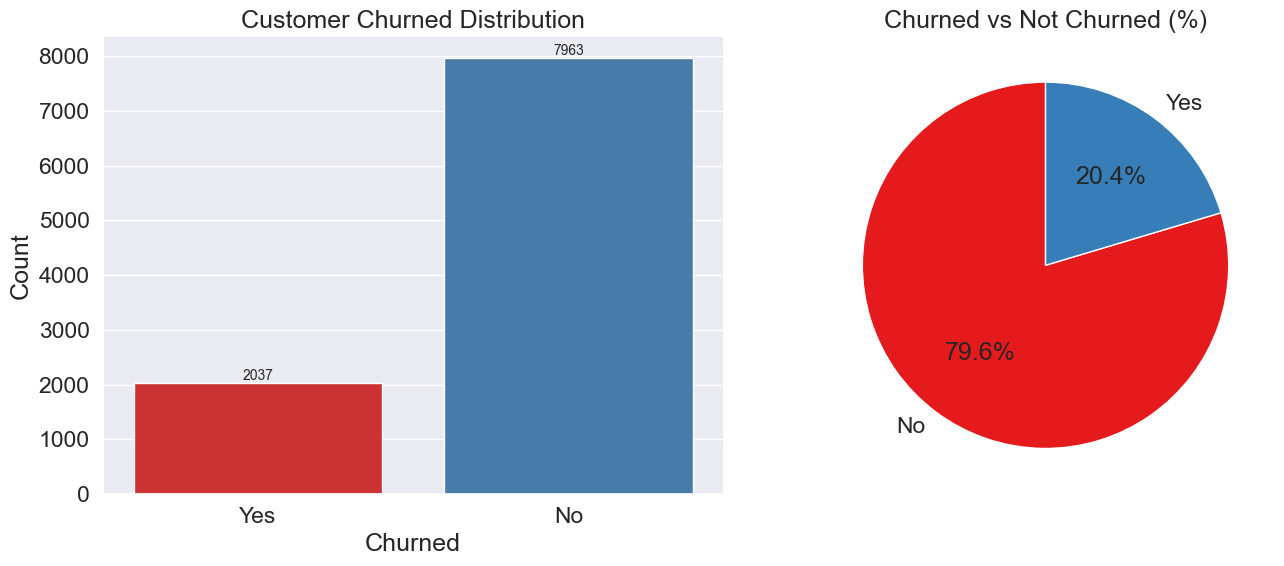

In [84]:
# Visulizing target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x='Churned', ax=axes[0], palette='Set1')
axes[0].set_title('Customer Churned Distribution')
axes[0].set_xlabel('Churned')
axes[0].set_ylabel('Count')

# Add value labels on each bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

churn_counts = df['Churned'].value_counts()
axes[1].pie(churn_counts, 
            labels=churn_counts.index, 
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('Set1'))
axes[1].set_title('Churned vs Not Churned (%)')

plt.tight_layout()
plt.show()

- Huge **Class Imbalance** which can lead to bias in model performance.
- Using **SMOTE** can overcome this imbalance.

##### Visualizing Churn with Gender

In [85]:
def countplot(col):
    fig, axes = plt.subplots(1, 1, figsize=(14, 6))

    sns.countplot(data=df, x=col, hue='Churned', ax=axes, palette='Set1')
    axes.set_title(f'{col} Churned Distribution')
    axes.set_xlabel('Churned')
    axes.set_ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for container in axes.containers:
        axes.bar_label(container,
                     labels=[f'{(v.get_height()/total)*100:.1f}%' for v in container],
                     label_type='edge',
                     fontsize=15)
    
    plt.tight_layout()
    plt.show()

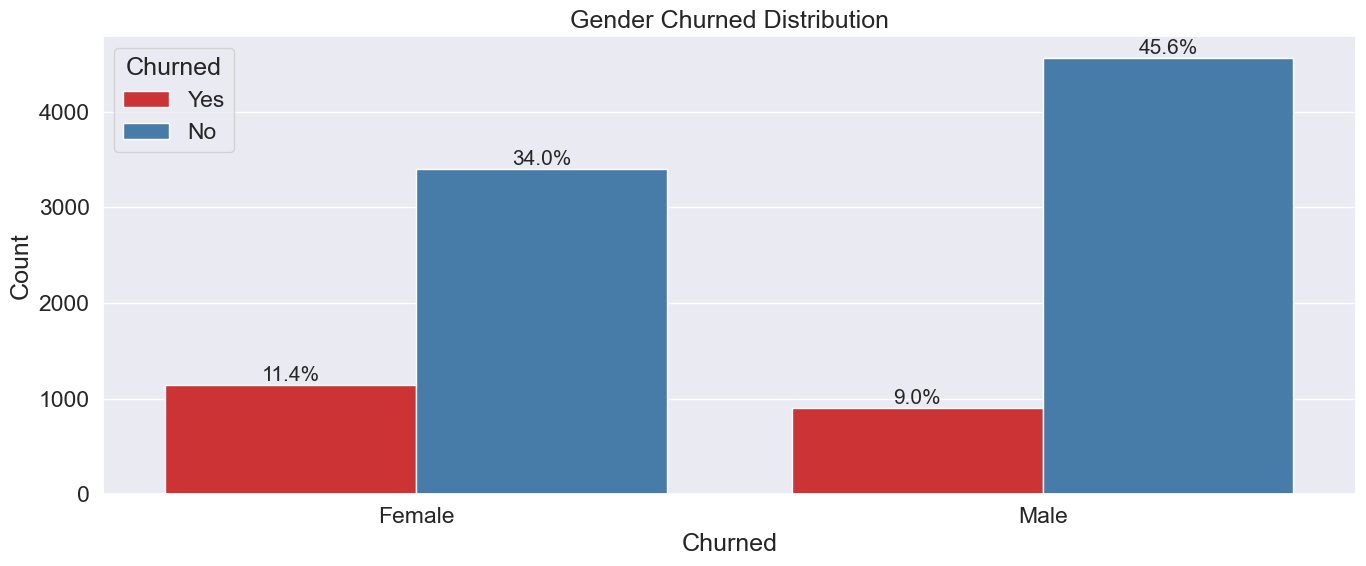

In [86]:
countplot('Gender')

- The **churned probability** is more for **Female Customers** compared to **Male Customers.**

##### Visualizing with Geography

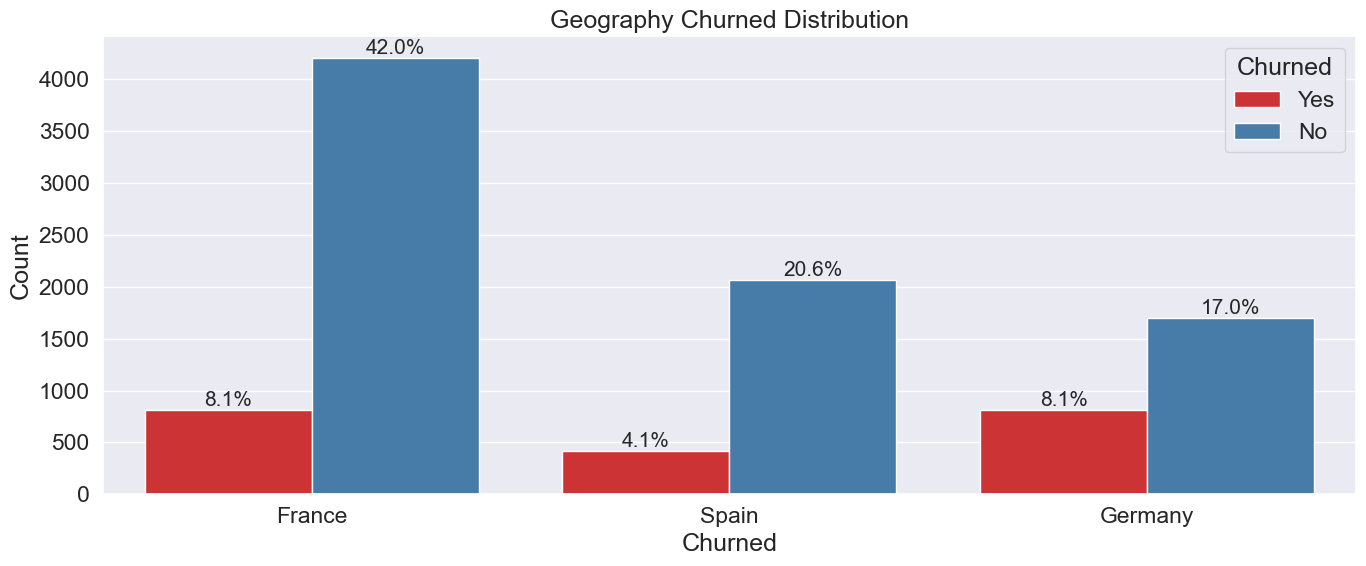

In [87]:
countplot('Geography')

- **Half of the customers** are from France then Germany and lastly Spain.
- **Churned Rate** for **France and Germany** are same.
- **Germany Churned Rate** is doubled the **Spain**.

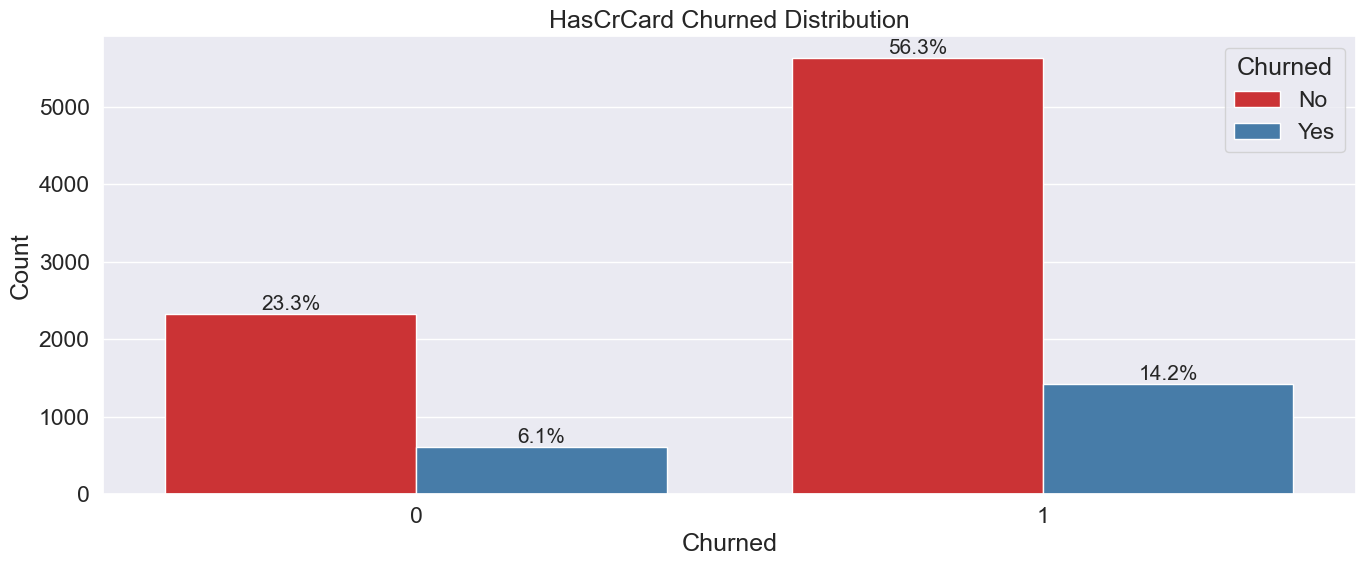

In [88]:
countplot('HasCrCard')

- **More than 70%** of the customers have the Credit Card.
- **The churn probability value** for the both the categories is **almost 1:4.**
- So **credit card is not affecting the churn of customers.**

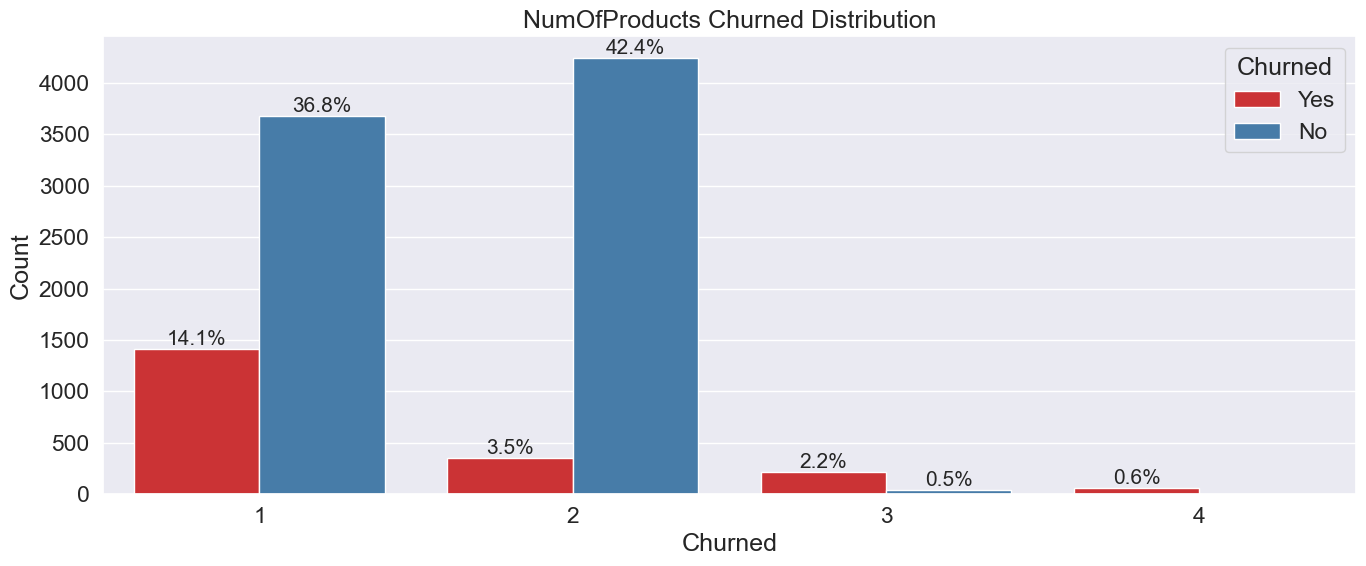

In [89]:
countplot('NumOfProducts')

- **Most of the customers** are having **either 1 or 2** total number of banking products.
- **The lowest churn rate** is with customers having **only 2 products.**
- There is **very high churn rate** in customers having **1 product or more than 2 products.**

The bank can try to convince the customers to have atleast 2 banking products.
They can provide Rewards and Incentives to the customers having atleast 2 banking products.

In [90]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


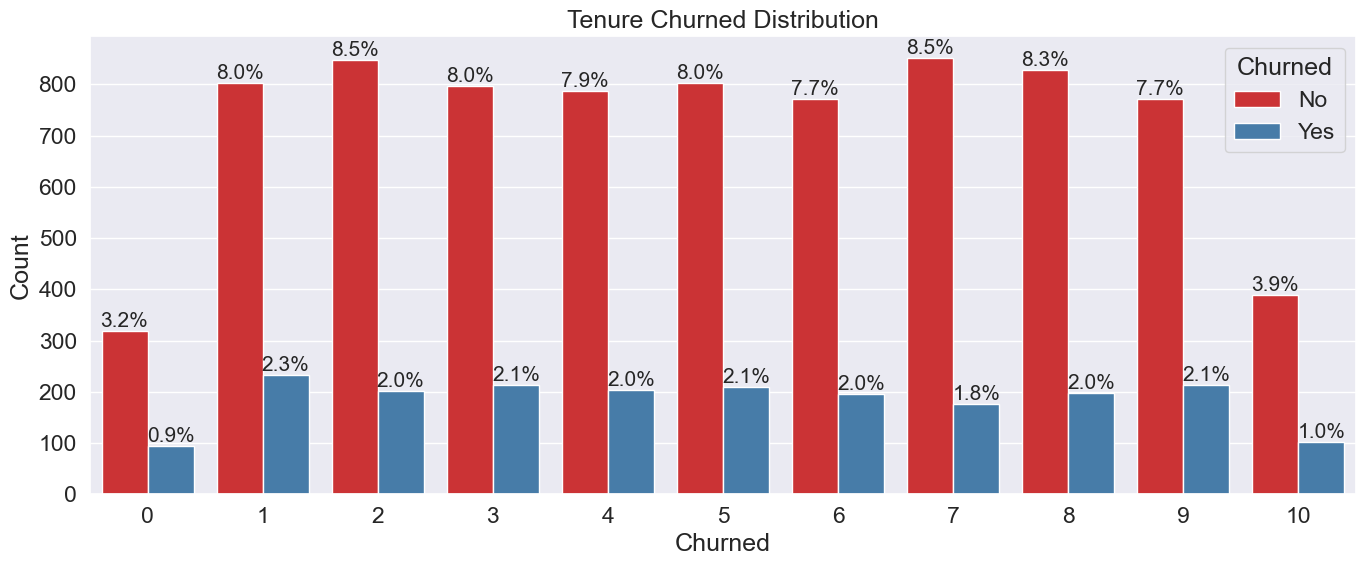

In [91]:
countplot('Tenure')

- The **highest tenure is 10 years** which means that those customers have **opened their account 10 years back.**
- Since there is **almost similar distribution of churn status** we can't make any specific inference.

In [92]:
def pdf_plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(data=df, x=col, hue='Churned', kde=True, ax=axes[0], palette='Set1')
    axes[0].set_title(f'Distribution of {col} by Churn Status')
    
    sns.boxplot(data=df, y=col, x='Churned', palette='Set1', ax=axes[1])
    axes[1].set_title(f'Box Plot of {col} by Churn Status')
    
    plt.tight_layout()
    plt.show()

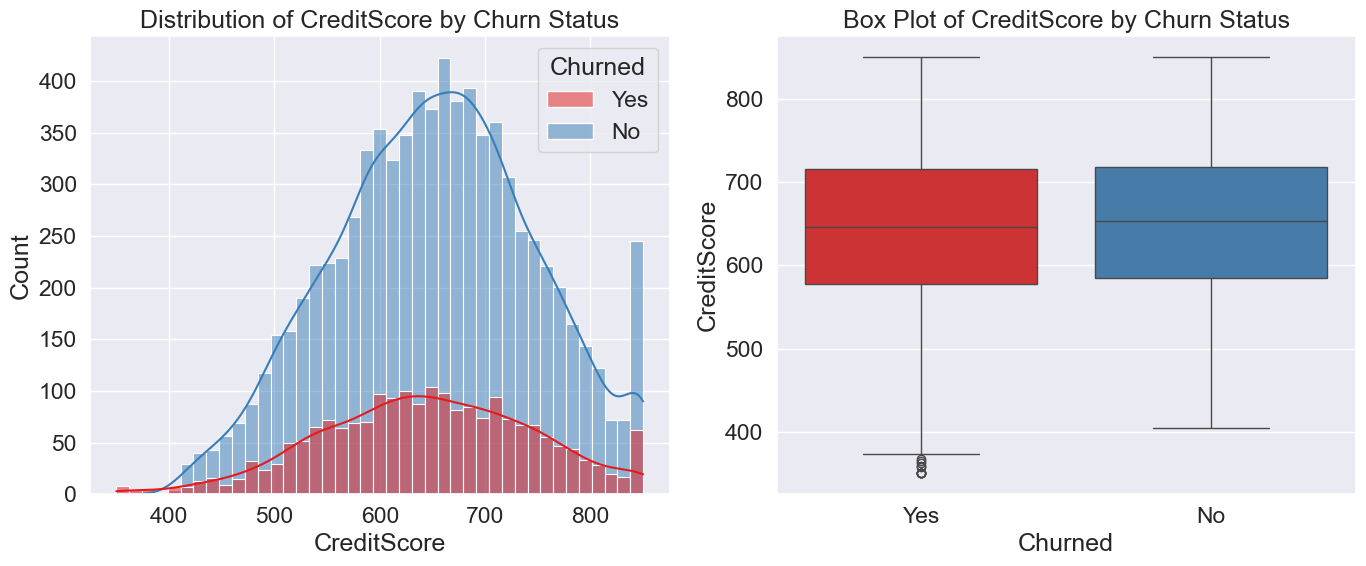

In [93]:
pdf_plot('CreditScore')

- The **Median CreditScore** of **both churned** and **not churned** customers are **approxiamately equal.**
- Since the **values are approximately equal** for both **churn status** we can't generate any **relevant inference.**

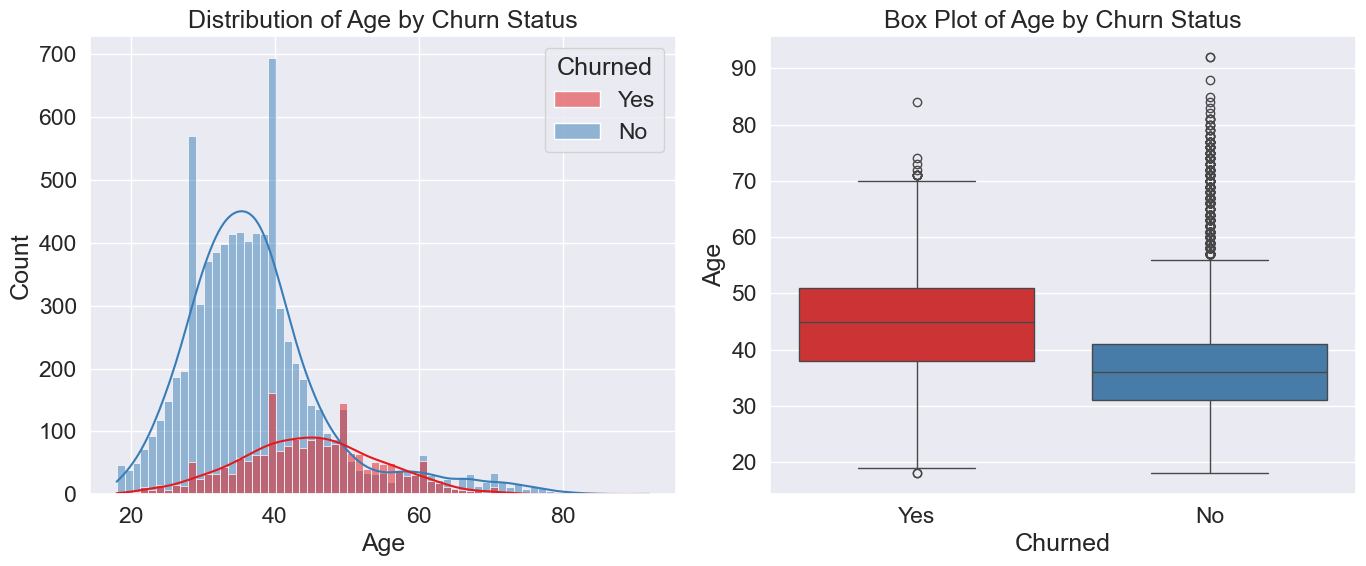

In [94]:
pdf_plot('Age')

- The **distribution is right skewed** because of **presence of outliers** which can lead to **overfitting in model.**
- To **overcome this right-skewed distribution** we can use **log normal transformation** technique to bring a **normal distribution.**

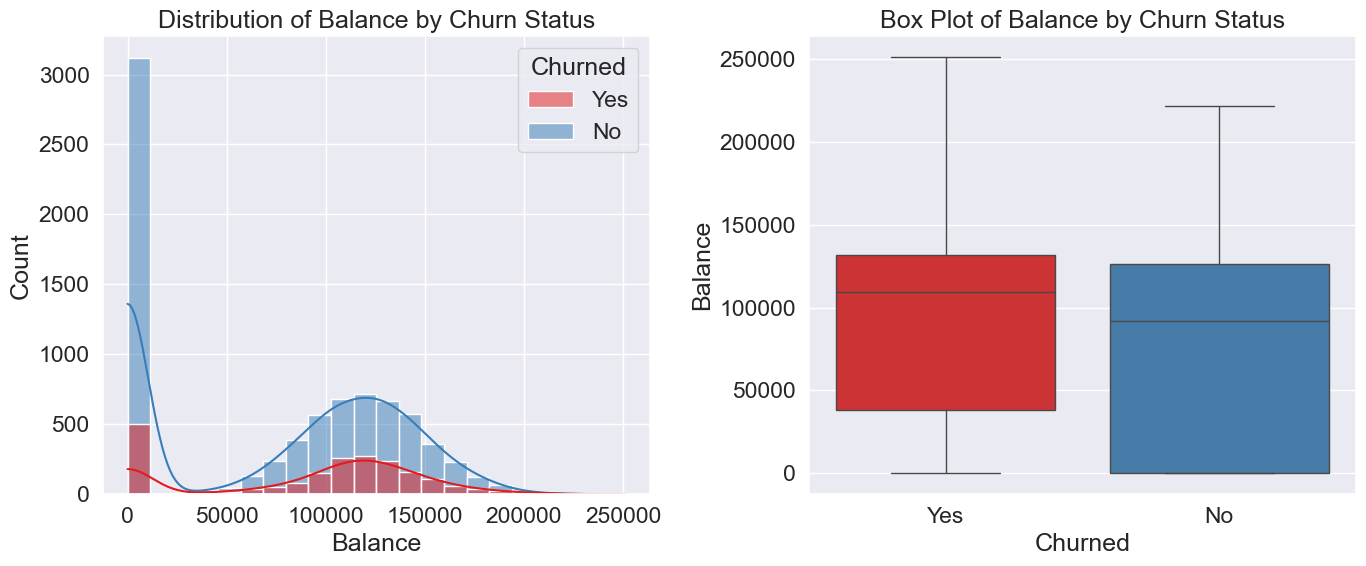

In [95]:
pdf_plot('Balance')

- **More than 3000 customers** are having their **account balance equal to zero.**
- Customers with **zero balance** are more likely to **deactivate their account.**
- **Excluding the zero value** we can observe a **normal distribution.** So don't have to use any other techniques.

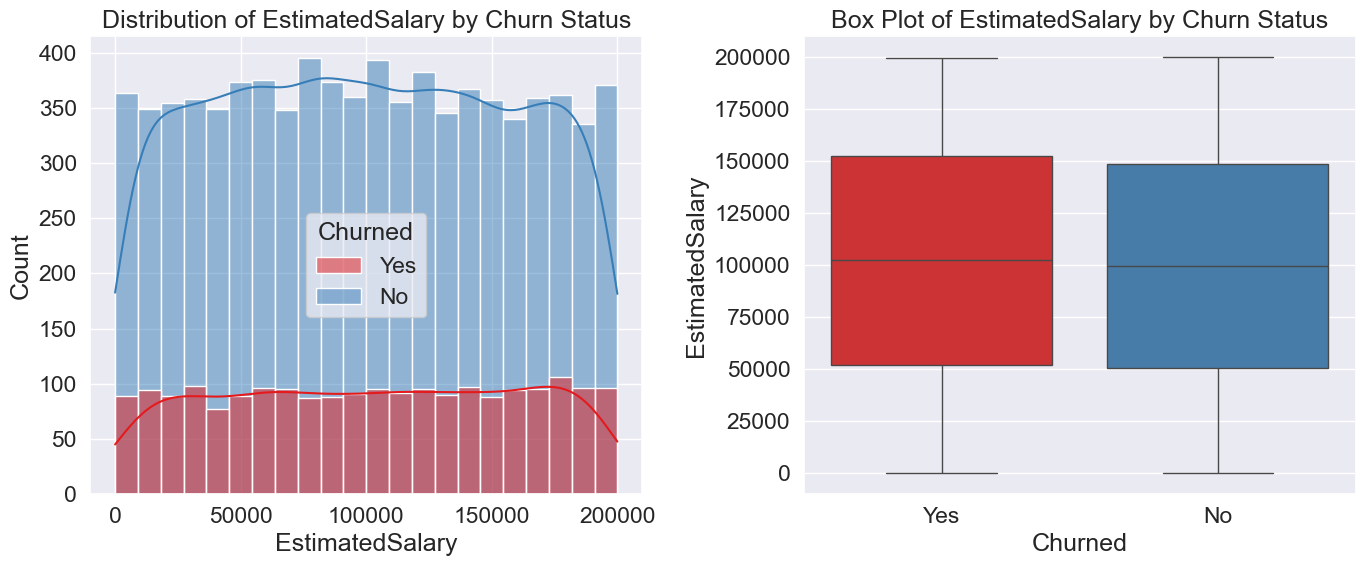

In [96]:
pdf_plot('EstimatedSalary')

- The **median value of EstimatedSalary** is **approxiamately same** for both the **churned categories.**
- Since the distribution is **kind of similar** for **both churn category** we can't make any **relevant inference.**

### Feature Engineering

In [97]:
# Feature Engineering
# NumOfProducts
conditions = [(df["NumOfProducts"]==1), 
              (df["NumOfProducts"]==2), 
              (df["NumOfProducts"]>2)]
values = ["One product","Two Products","More Than 2 Products"]

df["Total_Products"] = np.select(conditions,values, default="Unknown")

In [98]:
df.drop(columns="NumOfProducts", inplace=True)

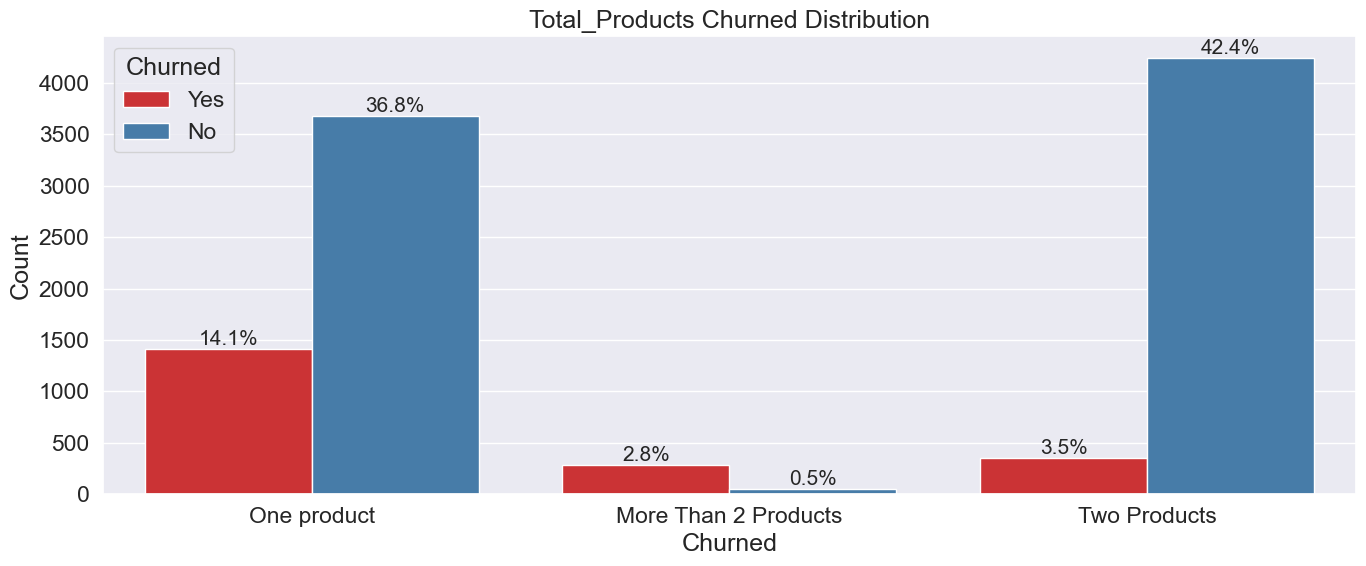

In [99]:
countplot('Total_Products')

In [100]:
# Balance
conditions = [(df["Balance"]==0), 
              (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

df["Account_Balance"] = np.select(conditions, values, default='Unknown')

In [101]:
df.drop(columns="Balance",inplace=True)

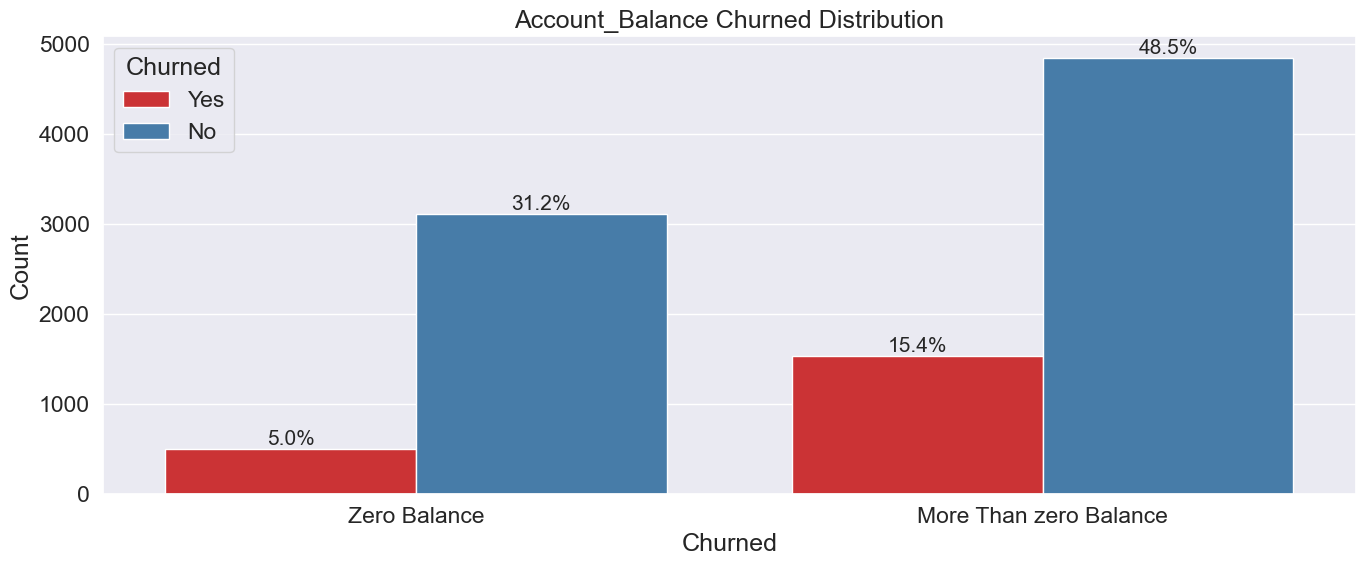

In [102]:
countplot("Account_Balance")

In [103]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,France,Female,42,2,1,1,101348.88,Yes,One product,Zero Balance
1,608,Spain,Female,41,1,0,1,112542.58,No,One product,More Than zero Balance
2,502,France,Female,42,8,1,0,113931.57,Yes,More Than 2 Products,More Than zero Balance
3,699,France,Female,39,1,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,1,1,79084.10,No,One product,More Than zero Balance


### Data Preprocessing

In [104]:
# OHE on Categorical Columns ['Geography', 'Gender', 'Total_Products', 'Account_Balance']
cat_col = ['Geography', 'Gender', 'Total_Products', 'Account_Balance']
df = pd.get_dummies(df, columns=cat_col, dtype=int)

In [105]:
# Label Encoding the Target Column ['Churned']
df['Churned'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [106]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


In [107]:
# Checking Skewness of Continous Features
cols = ['CreditScore', 'Age', 'EstimatedSalary']
df[cols].skew().to_frame().rename(columns={0: 'Feature Skewness'})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


In [108]:
# Appling Log-normal transformation on Age Column
old_age = df['Age']
df['Age'] = np.log(df['Age'])

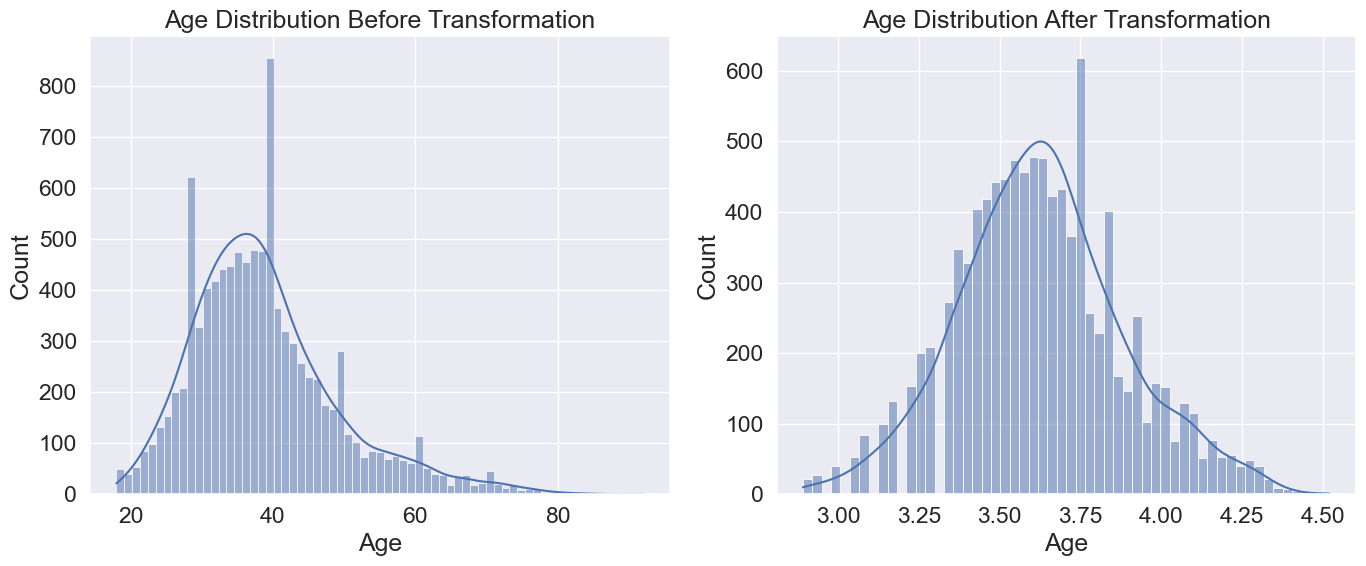

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x=old_age, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution Before Transformation')

sns.histplot(data=df, x=df['Age'], kde=True, ax=axes[1])
axes[1].set_title('Age Distribution After Transformation')

plt.tight_layout()
plt.show()

In [110]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,3.737670,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,3.713572,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,3.737670,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,3.663562,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,3.761200,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


In [111]:
X = df.drop(columns=['Churned'])
y = df['Churned']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [113]:
# # Save the Data
# data_path = os.path.join('data', 'features')
# os.makedirs(data_path)

# train_df = X_train
# train_df['label'] = y_train

# test_df = X_test
# test_df['label'] = y_test

In [114]:
# train_df.to_csv(os.path.join(data_path, 'train_df.csv'), index=False)
# test_df.to_csv(os.path.join(data_path, 'test_df.csv'), index=False)

In [115]:
# Balancing Data
smt = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

In [116]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
0,6356
1,6356


### Model Training

##### Decision Tree

In [117]:
dt = DecisionTreeClassifier()

In [118]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [119]:
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled,y_train_resampled)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'max_features': ['auto', None], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [120]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'random_state': 0,
 'splitter': 'random'}

In [121]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(X_train_resampled, y_train_resampled)

,criterion,'entropy'
,splitter,'random'
,max_depth,9
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [122]:
y_train_pred = dtree.predict(X_train_resampled)
y_test_pred = dtree.predict(X_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled, y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test, y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.99 %
Accuracy Score of Model on Testing Data  is => 84.65 %


In [123]:
print("F1 Score of the Model is =>",f1_score(y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test, y_test_pred, average="micro"))

F1 Score of the Model is => 0.8465
Recall Score of the Model is => 0.8465
Precision Score of the Model is => 0.8465


In [124]:
# Feature importance
imp_df = pd.DataFrame({"Feature Name": X_train.columns,
                       "Importance": dtree.feature_importances_})

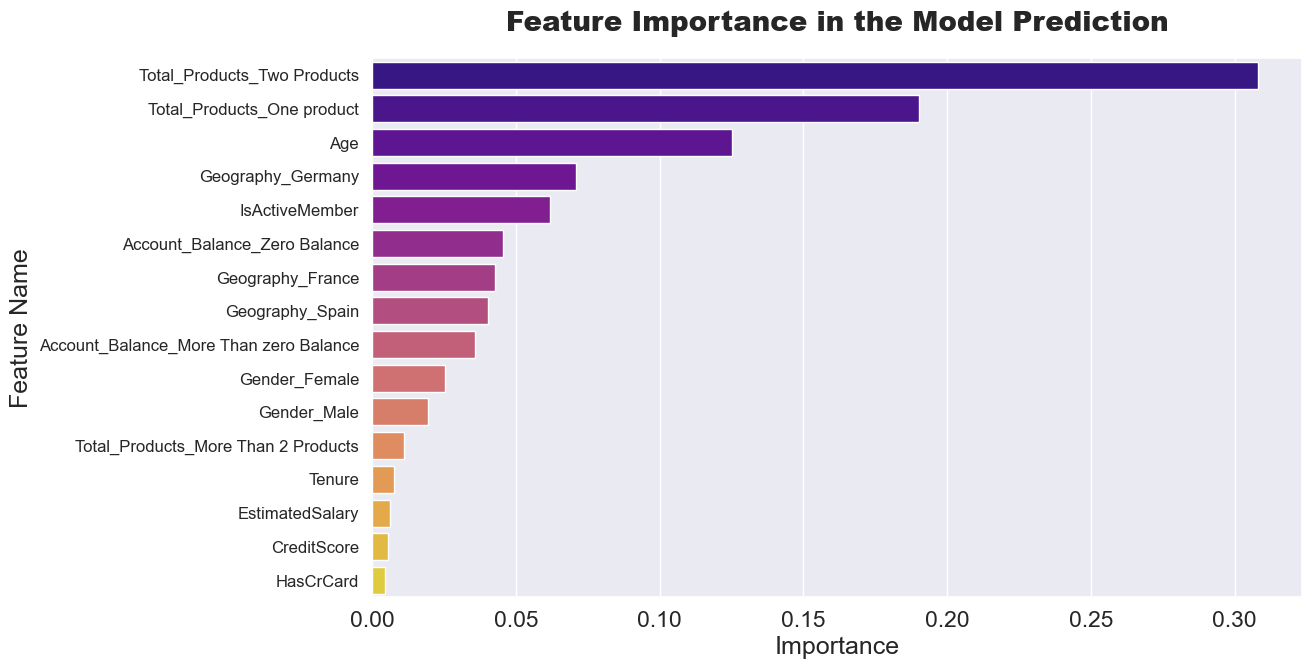

In [125]:
features = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

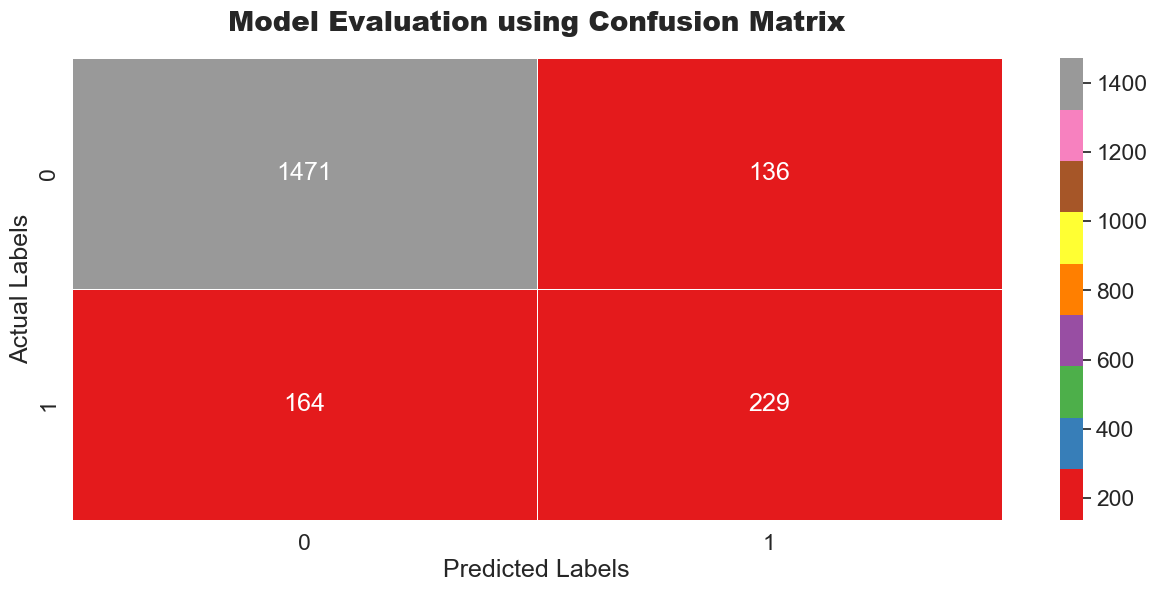

In [163]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix", fontsize=20, pad=20, fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

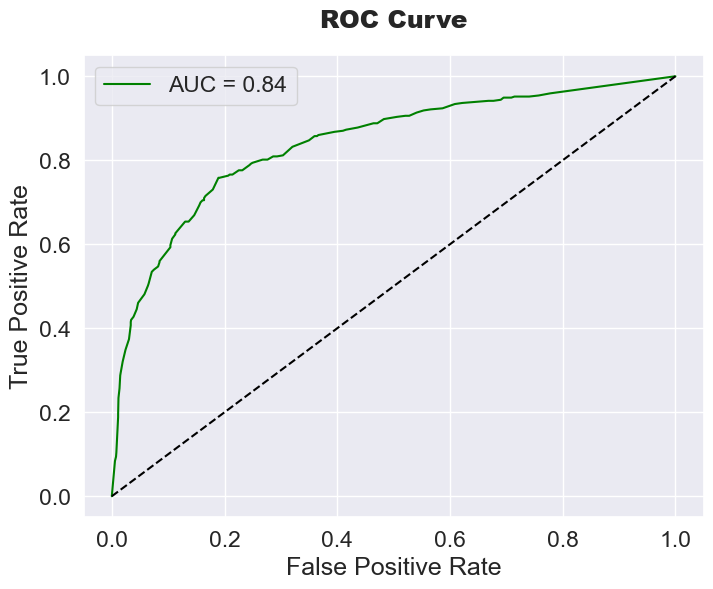

In [128]:
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()                                                                                                                     

##### RandomForest Classifier

In [129]:
rfc = RandomForestClassifier()

In [130]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [131]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [3, 4, ...], 'min_samples_split': [3, 4, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [132]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 50}

In [148]:
rfc = RandomForestClassifier(**best_parameters, class_weight='balanced')
rfc.fit(X_train_resampled, y_train_resampled)

,n_estimators,50
,criterion,'gini'
,max_depth,8
,min_samples_split,6
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [149]:
y_train_pred = rfc.predict(X_train_resampled)
y_test_pred  = rfc.predict(X_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled, y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test, y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 90.47 %
Accuracy Score of Model on Testing Data  is => 85.0 %


In [150]:
print("F1 Score of the Model is =>",f1_score(y_test, y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test, y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test, y_test_pred,average="micro"))

F1 Score of the Model is => 0.85
Recall Score of the Model is => 0.85
Precision Score of the Model is => 0.85


In [151]:
imp_df = pd.DataFrame({"Feature Name": X_train.columns,
                       "Importance": rfc.feature_importances_})

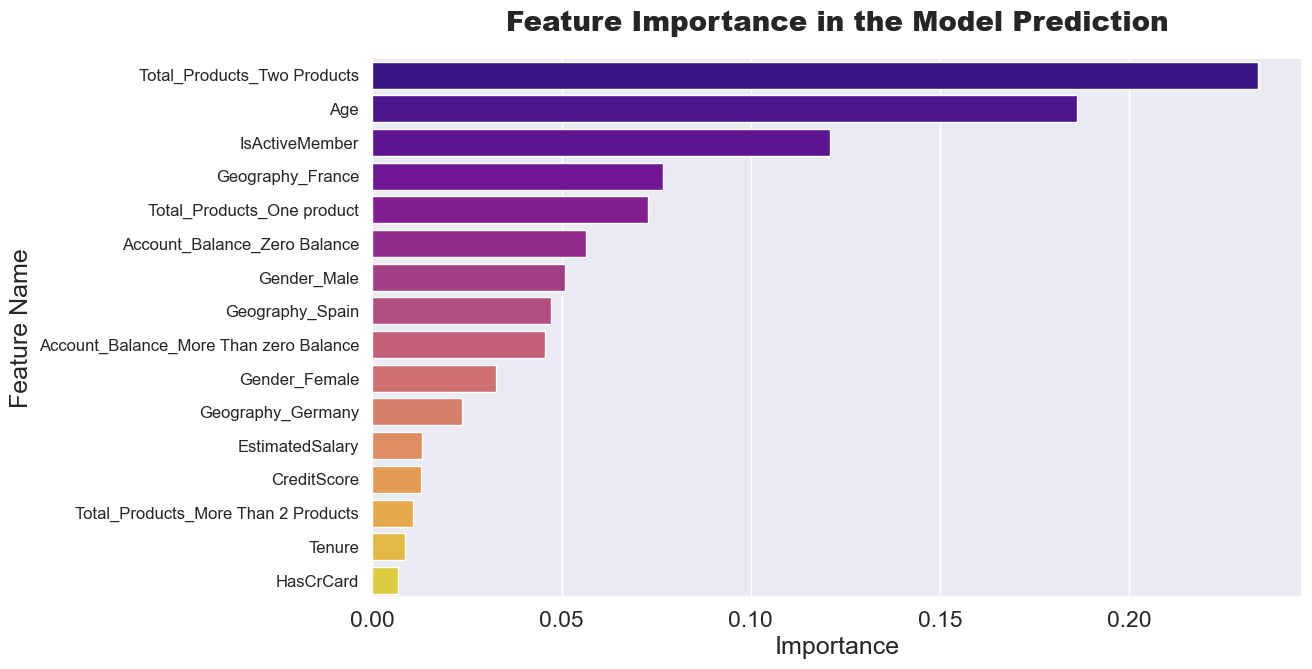

In [152]:
features = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

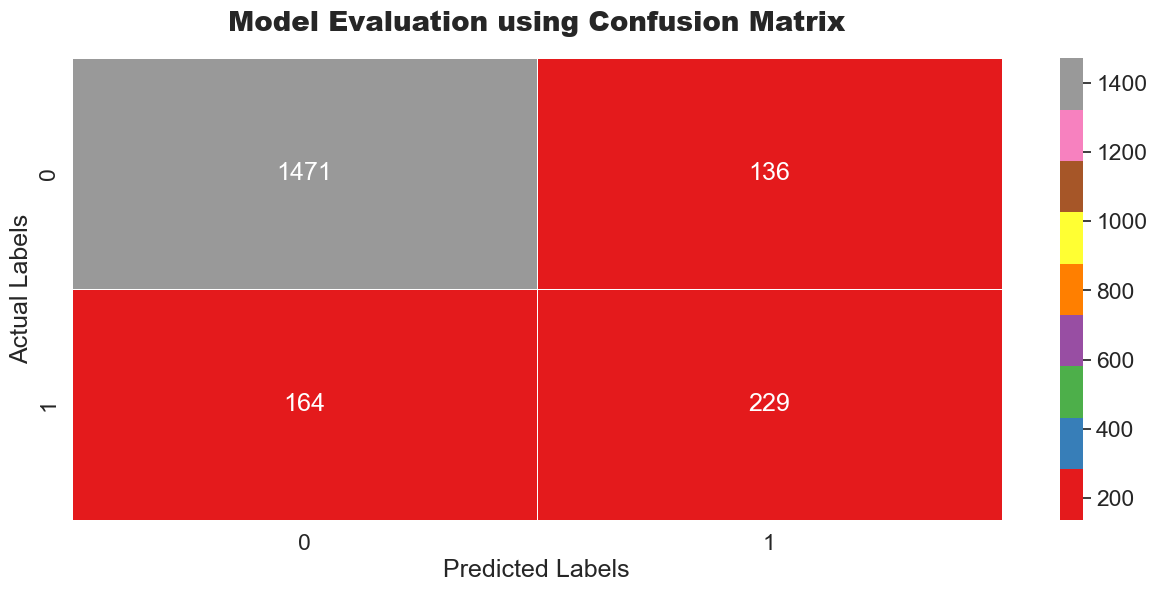

array([[1471,  136],
       [ 164,  229]])

In [164]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

cm

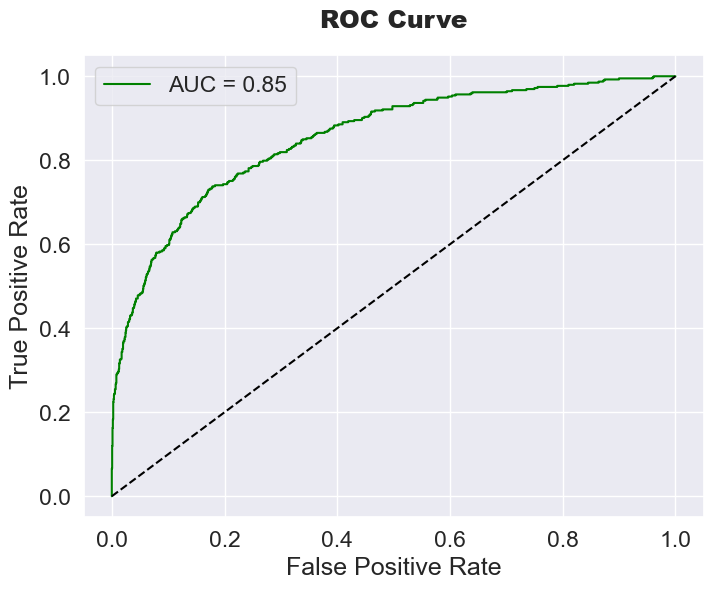

In [154]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()
